Importamos librerias.

In [1]:
#Para manipulacion de datos.
import pandas as pd
import numpy as np

#Para visualizacion de datos.
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
%matplotlib inline

#Para mostrar estadisticas.
from scipy import stats
from sklearn import metrics
from sklearn import datasets

#Para la regresion logistica y seleccion de features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import train_test_split

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Cargamos el dataset.

In [2]:
df = pd.read_csv('adult.csv',skiprows=1,names=['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation', 'relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income'])
print(df.shape)
print(df.isna().sum())

(32561, 15)
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Hacemos revision de datos faltantes

In [3]:
df = df.applymap(lambda x : np.nan if x == "?" else x).dropna() #Decidimos deshacernos de ellos ya que solo se componen por aproximadamente 2000 registros.
df.shape

(30162, 15)

Revisamos columnas

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
#print(df.age.unique()) #No es necesario convertir

#print(df.workclass.unique()) 
#'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc','Local-gov' 'Without-pay'

#df.education.unique() 
#'HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate','Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc','1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'

#df.sort_values("education.num") 
#De 1 - preschool a 16 - Doctorate

#df["marital_status"].unique() #7 val
#'Widowed', 'Divorced', 'Separated', 'Never-married','Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'

#df.occupation.unique() # 14 val
#'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty','Other-service', 'Adm-clerical', 'Transport-moving', 'Sales','Craft-repair', 'Farming-fishing', 'Tech-support','Protective-serv', 'Handlers-cleaners', 'Armed-Forces','Priv-house-serv'

#df.relationship.unique()
#'Not-in-family', 'Unmarried', 'Own-child', 'Other-relative','Husband', 'Wife'

#print(df.race.unique()) # 5 val
#'White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'

#df.sex.unique() # 2 val

#print(df['capital_loss']) #No es necesario convertir

#df.fnlwgt.unique().shape

#sns.distplot(df.fnlwgt)


#df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})


Hacemos cambios en los datos.

In [6]:
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})

df["marital_status_num"] = df["marital_status"].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3,'Married-civ-spouse':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6})

df["occupation_num"] = df["occupation"].map({'Exec-managerial':0, 'Machine-op-inspct':1, 'Prof-specialty':2,'Other-service':3, 'Adm-clerical':4, 'Transport-moving':5, 'Sales':6,'Craft-repair':7, 'Farming-fishing':8, 'Tech-support':9,'Protective-serv':10, 'Handlers-cleaners':11, 'Armed-Forces':12,'Priv-house-serv':13})

df["relationship_num"] = df.relationship.map({'Not-in-family':0, 'Unmarried':1, 'Own-child':2, 'Other-relative':3,'Husband':4, 'Wife':5})

df["race_num"] = df.race.map({'White':0 ,'Black':1, 'Asian-Pac-Islander':2 ,'Other':3, 'Amer-Indian-Eskimo':4})

df["sex_num"] = np.where(df.sex == "Male", 0,1) #dos valores; a una variable dummy 

df["capital_chage"] = df["capital_loss"].apply(lambda x : -x) + df["capital_gain"]

df["american_num"] = np.where(df["native_country"] == "United-States", 1,0) #dos valores para no sobrecomplicar la dummy 0 si es extranjero, 1 si es estadounidense

df["income_num"] = np.where(df.income == '<=50K', 0, 1) #Dos valores; a una variable dummy

numerable = ["age","workclass_num","education_num","marital_status_num","occupation_num","relationship_num","sex_num","capital_loss","capital_gain",'hours_per_week','american_num']
target = ["income_num"]


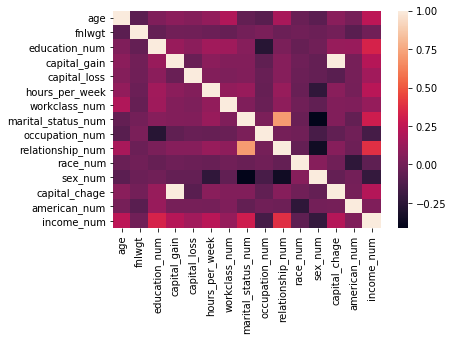

In [7]:
sns.heatmap(df.corr());
#df.corr()["feature"].apply(abs).sort_values(ascending=False)

In [8]:
X = df[numerable]
y = df[target]

In [9]:
#X = df['workclass_num', 'education.num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']

In [10]:
X.shape

(30162, 11)

In [11]:
# Creamos un clasificador base para evaluar un subconjunto de atributos
logreg = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(logreg, 4)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
muestra = zip(rfe.support_,rfe.ranking_,X.columns)
#print(rfe.support_)
#print(rfe.ranking_)
#print(X.columns)
for i in muestra:
    print(i)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(False, 4, 'age')
(False, 6, 'workclass_num')
(True, 1, 'education_num')
(False, 3, 'marital_status_num')
(False, 2, 'occupation_num')
(True, 1, 'relationship_num')
(True, 1, 'sex_num')
(False, 7, 'capital_loss')
(False, 8, 'capital_gain')
(False, 5, 'hours_per_week')
(True, 1, 'american_num')


Chequeamos la feature importances.

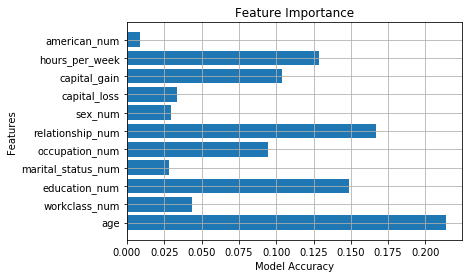

In [12]:
# fittear un modelo de arbol a los datos.
extree = ExtraTreesClassifier()
extree.fit(X, np.ravel(y))

# describir la importancia de cada feature.
relval = extree.feature_importances_

# Barra horizontal de la importancia de las features.
pos = np.arange(11) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ("age","workclass_num","education_num","marital_status_num","occupation_num","relationship_num","sex_num","capital_loss","capital_gain",'hours_per_week','american_num'))
plt.grid(True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
y_train = np.ravel(y_train)

Probamos utilizar regresion logistica.

In [14]:
# Instanciasión.
logreg = LogisticRegression()

# Fiteo.
logreg.fit(X_train, y_train)

# Predicción.
y_pred = logreg.predict(X_test)

print('LogReg %s' % metrics.accuracy_score(y_test, y_pred))

LogReg 0.8350351412279539


Probamos usar k-vecínos

In [15]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))


21 0.8574459620739955


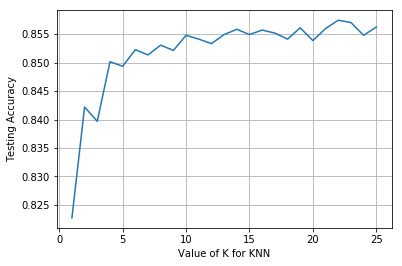

In [16]:
# plot the relationship between K and testing precisión
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

In [17]:
df.income.value_counts(normalize=False)

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [18]:
df[["age","workclass_num","education_num","marital_status_num","occupation_num","relationship_num","sex_num","capital_loss","capital_gain",'hours_per_week','american_num',"income_num"]].to_csv("adult_clean.csv", encoding='utf-8', index=False)